In [1]:
import cv2
import numpy as np

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
image_gen= ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,zoom_range=0.2,fill_mode='nearest')

In [6]:
image_gen.flow_from_directory('C:\\Users\\Isna Khan\\project isna final AI\\pictures\\train')

Found 14002 images belonging to 2 classes.


In [7]:
from keras.models import Sequential

In [8]:
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [11]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(400,400,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(400,400,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(400,400,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 197, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 147456)           

In [14]:
train_image_gen = image_gen.flow_from_directory('C:\\Users\\Isna Khan\\project isna final AI\\pictures\\train',
                             target_size=(400,400),
                             batch_size=16,
                             class_mode='binary')

Found 14002 images belonging to 2 classes.


In [15]:
test_image_gen = image_gen.flow_from_directory('C:\\Users\\Isna Khan\\project isna final AI\\pictures\\test',
                             target_size=(400,400),
                             batch_size=16,
                             class_mode='binary')

Found 5136 images belonging to 2 classes.


In [16]:
train_image_gen.class_indices

{'empty pallet': 0, 'occupied pallet': 1}

In [17]:
results = model.fit_generator(train_image_gen,epochs=2,steps_per_epoch=100,
                              validation_data =test_image_gen,validation_steps=12)

Epoch 1/2
100/100 [==============================] - 664s 7s/step - loss: 39.3885 - accuracy: 0.5819 - val_loss: 0.5966 - val_accuracy: 0.6042
Epoch 2/2
100/100 [==============================] - 749s 7s/step - loss: 0.6429 - accuracy: 0.6288 - val_loss: 0.6600 - val_accuracy: 0.6510


In [19]:
results.history['accuracy']

[0.581875, 0.62875]

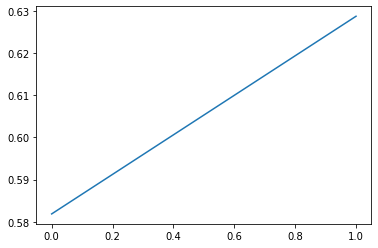

In [20]:
plt.plot(results.history['accuracy'])

In [23]:
model.save('empty_occupied.h5')

In [24]:
from keras.models import load_model

In [25]:
new_model = load_model('empty_occupied.h5')

In [39]:
pallet_file = 'C:\\Users\\Isna Khan\\project isna final AI\\pictures\\test\\occupied\\occupied pallet. (37).jpg'

In [40]:
from keras.preprocessing import image

In [41]:
pallet_img = image.load_img(pallet_file,target_size=(400,400))

In [42]:
pallet_img = image.img_to_array(pallet_img)

In [43]:
pallet_img.shape

(400, 400, 3)

In [44]:
import numpy as np
pallet_img = np.expand_dims(pallet_img,axis=0)

In [45]:
model.predict_classes(pallet_img)

array([[1]])

In [46]:
model.predict(pallet_img)

array([[0.55680245]], dtype=float32)